In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
# Set the ticker as 'EURUSD=X'
forex_data = yf.download('EURUSD=X', start='2022-09-01', end='2022-10-01')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,0.968992,0.969989,0.958231,0.968992,0.968992,0
2022-09-27,0.962371,0.967006,0.959453,0.962371,0.962371,0
2022-09-28,0.959619,0.968626,0.954016,0.959619,0.959619,0
2022-09-29,0.970817,0.978732,0.963828,0.970817,0.970817,0
2022-09-30,0.982956,0.984999,0.973606,0.982956,0.982956,0


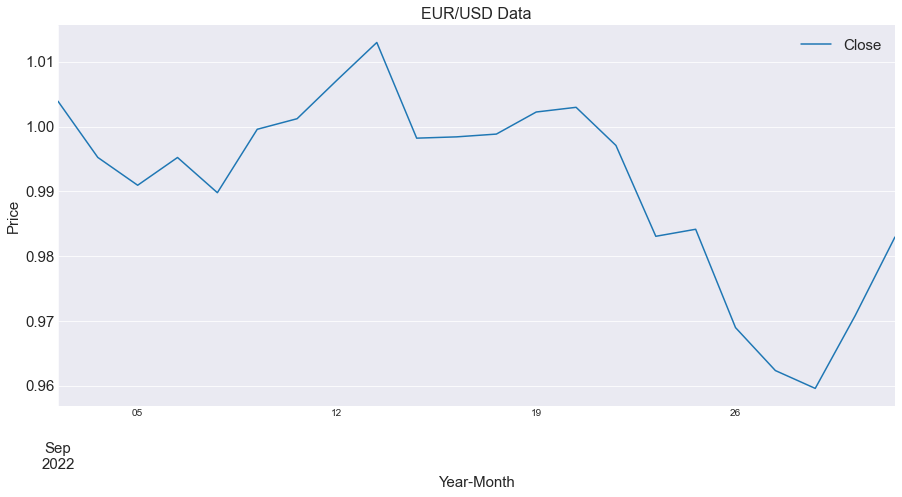

In [8]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Adj Close'].plot()

# Set the title and axis label
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

## Minute FX Price Data

In [7]:
# Set the ticker as 'EURUSD=X'
forex_data_minute = yf.download('EURUSD=X', period='5d', interval='1m')

# Set the index to a datetime object
forex_data_minute.index = pd.to_datetime(forex_data_minute.index)

# Display the last five rows
forex_data_minute.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-21 22:24:00,0.986193,0.986193,0.986193,0.986193,0.986193,0
2022-10-21 22:25:00,0.986193,0.986193,0.986193,0.986193,0.986193,0
2022-10-21 22:26:00,0.986193,0.986193,0.986193,0.986193,0.986193,0
2022-10-21 22:27:00,0.986193,0.986193,0.986193,0.986193,0.986193,0
2022-10-21 22:28:00,0.986193,0.986193,0.986193,0.986193,0.986193,0


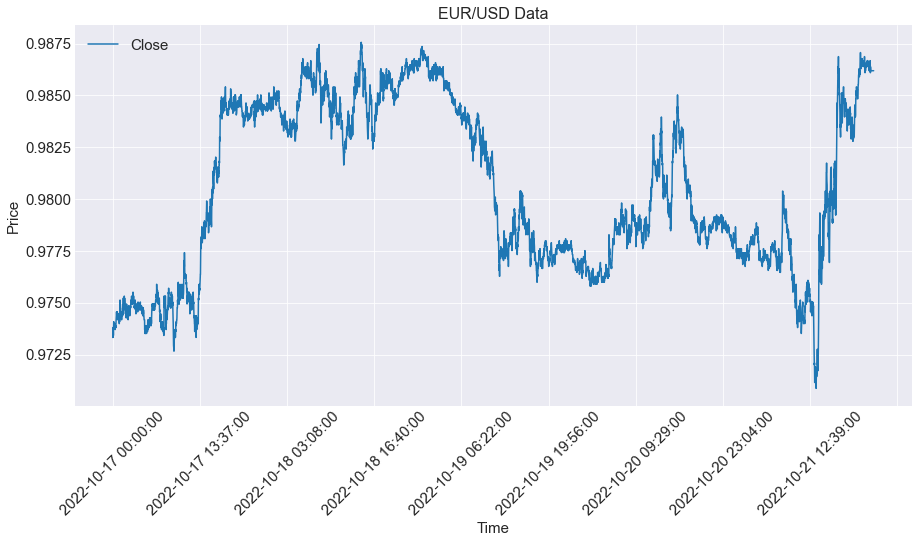

In [9]:
#plot
# Transform index type from datetime to string
forex_data_minute['dates'] = forex_data_minute.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_minute['dates'], forex_data_minute['Adj Close'])

# Set title and axis label
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Daily Data of Two Forex Pairs

In [10]:
# Set the ticker as 'EURUSD=X'
forex_data = yf.download(['EURUSD=X', 'GBPUSD=X'],
                         start='2019-01-02', end='2021-12-31', group_by='ticker')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%***********************]  2 of 2 completed


EURUSD=X                                                 GBPUSD=X  \
                Open      High       Low     Close Adj Close Volume      Open   
Date                                                                            
2021-12-24  1.132464  1.134430  1.130838  1.132734  1.132734      0  1.340914   
2021-12-27  1.132387  1.133500  1.130416  1.132426  1.132426      0  1.340520   
2021-12-28  1.132978  1.133600  1.129038  1.133003  1.133003      0  1.344447   
2021-12-29  1.131337  1.137001  1.127536  1.131478  1.131478      0  1.343400   
2021-12-30  1.135976  1.135976  1.130071  1.136015  1.136015      0  1.349764   

                                                           
                High       Low     Close Adj Close Volume  
Date                                                       
2021-12-24  1.342570  1.339405  1.340662  1.340662      0  
2021-12-27  1.344070  1.339226  1.340430  1.340430      0  
2021-12-28  1.346257  1.341832  1.344267  1.344267      0  
2021-12-29  1.349928  1.340914  1.343328  1.343328      0  
2021-12-30  1.352155  1.345533  1.349879  1.349879      0

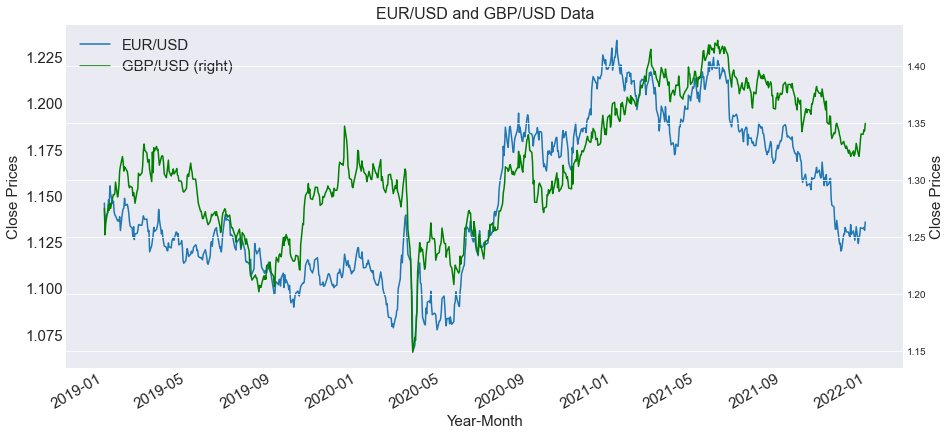

In [13]:
# Plot the close price
ax = plt.figure(figsize=(15, 7))

# Plot both forex pairs
ax = forex_data['EURUSD=X']['Close'].plot(label='EUR/USD')
ax2 = forex_data['GBPUSD=X']['Close'].plot(secondary_y=True, color='g',  ax=ax, label='GBP/USD')

# Set the title and axis labels
plt.title('EUR/USD and GBP/USD Data', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Close Prices', fontsize=15)
ax2.set_ylabel('Close Prices', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

# Save the figure
plt.savefig('EURUSD_and_GBPUSD_Daily_Data.png', bbox_inches = 'tight')
# Show the plot
plt.show()


## Machine learning to predict the trend 

In [1]:
#Import libraries 
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
import yfinance as yf
# Set the ticker as 'EURUSD=X'
forex_data_minute = yf.download('EURUSD=X',start='2015-01-01', end='2021-12-30')

# Set the index to a datetime object
forex_data_minute.index = pd.to_datetime(forex_data_minute.index)

# Display the last five rows
forex_data_minute.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,1.133016,1.134559,1.129152,1.132888,1.132888,0
2021-12-24,1.132464,1.134430,1.130838,1.132734,1.132734,0
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.132426,0
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.133003,0
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131478,0


In [3]:
len(forex_data_minute)

1822

In [4]:
#Drop last two columns 
forex_data = forex_data_minute.drop(["Volume","Adj Close"], axis=1)
forex_data.tail()

,Open,High,Low,Close
Date,,,,
2021-12-23,1.133016,1.134559,1.129152,1.132888
2021-12-24,1.132464,1.134430,1.130838,1.132734
2021-12-27,1.132387,1.133500,1.130416,1.132426
2021-12-28,1.132978,1.133600,1.129038,1.133003
2021-12-29,1.131337,1.137001,1.127536,1.131478


In [5]:
#use open price to train the data
training_set = forex_data.iloc[:,1:2].values

print(training_set)

[[1.20986283]
 [1.208956  ]
 [1.19759047]
 ...
 [1.13350022]
 [1.13360047]
 [1.13700056]]


In [6]:
print(training_set.shape)

(1822, 1)


In [7]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range =(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.78511745],
       [0.7808763 ],
       [0.72772058],
       ...,
       [0.42797543],
       [0.42844431],
       [0.44434626]])

In [8]:
#Create X_train and y_train data structures
X_train = []
y_train = []
for i in range (60,1822):#30%
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1762, 60)
(1762,)


In [9]:
#Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1762, 60, 1)

In [10]:
#importing libraries to build the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

2022-10-23 12:41:56.703848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [49]:
#Extracting the actual stock price for Jan-22
dataset_test1= yf.download('EURUSD=X',start='2021-01-01', end='2021-12-30')

# Set the index to a datetime object
dataset_test1.index = pd.to_datetime(dataset_test1.index)

# Display the last five rows
dataset_test1.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,1.133016,1.134559,1.129152,1.132888,1.132888,0
2021-12-24,1.132464,1.134430,1.130838,1.132734,1.132734,0
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.132426,0
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.133003,0
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131478,0


In [50]:
#Drop last two columns 
dataset_test = dataset_test1.drop(["Volume","Adj Close"], axis=1)
dataset_test.tail()

,Open,High,Low,Close
Date,,,,
2021-12-23,1.133016,1.134559,1.129152,1.132888
2021-12-24,1.132464,1.134430,1.130838,1.132734
2021-12-27,1.132387,1.133500,1.130416,1.132426
2021-12-28,1.132978,1.133600,1.129038,1.133003
2021-12-29,1.131337,1.137001,1.127536,1.131478


In [51]:
actual_stock_price = dataset_test.iloc[:,1:2].values

In [52]:
#preparing the input of the model
dataset_total = pd.concat((forex_data['Open'],forex_data['Open']), axis =0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [53]:
#rescale X_test

In [54]:
#predicting the value for Jan 2022
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 58ms/step


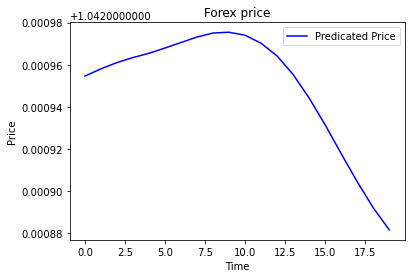

In [59]:
#plt.plot(actual_stock_price, color = 'red', label= 'Actual price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicated Price')
plt.title('Forex price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()